# This is a the All Sky Simulation for MWM OB Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
ver='gamma-0'
oldtarget_tab = Table.read('workspace/target_files/OB/{}/mwm_ob_target.fits'.format(ver))
oldcadence_tab = Table.read('workspace/target_files/OB/{}/mwm_ob_cadence.fits'.format(ver))
oldtarget_tab

ra,dec,cadence,type,priority,value
float64,float64,bytes16,bytes12,int32,float32
152.809049287146,-55.159372427282925,mwm_galactic_3x1,mwm_galactic,75,1.0
198.2181558941519,-63.39607183705437,mwm_galactic_3x1,mwm_galactic,75,1.0
238.87384124217257,-56.215533607340305,mwm_galactic_3x1,mwm_galactic,75,1.0
182.42608974399056,-59.26846378144531,mwm_galactic_3x1,mwm_galactic,75,1.0
186.05396845662153,-63.39587721140279,mwm_galactic_3x1,mwm_galactic,75,1.0
197.33860379280435,-64.6825443734766,mwm_galactic_3x1,mwm_galactic,75,1.0
238.45666725428245,-63.39584716115922,mwm_galactic_3x1,mwm_galactic,75,1.0
179.03734944434814,-64.68230285202448,mwm_galactic_3x1,mwm_galactic,75,1.0
184.5769712595937,-64.68218755277057,mwm_galactic_3x1,mwm_galactic,75,1.0


/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:206: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=185,lat_0=0)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


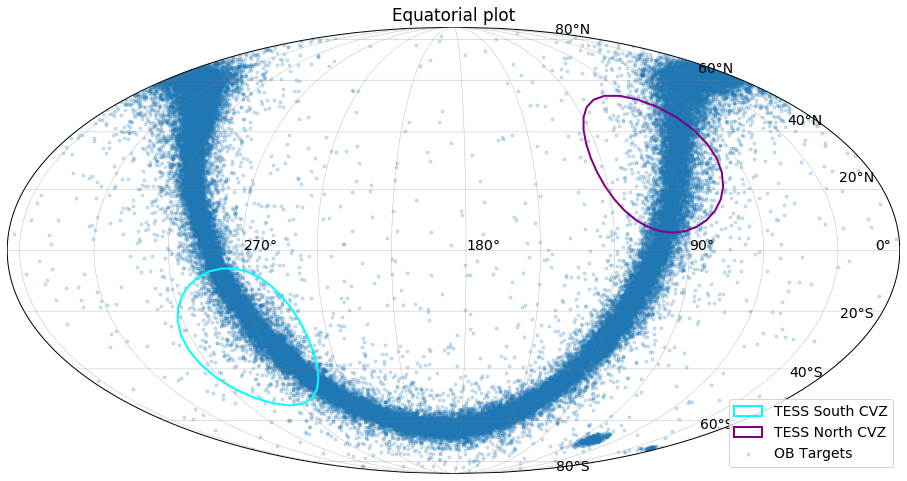

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_gal()
#Plot OB Targets
xdim,ydim = bmap(oldtarget_tab['ra'],oldtarget_tab['dec'])
bmap.scatter(xdim,ydim,marker='.',label='OB Targets',alpha=0.2)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Update Target Table

In [4]:
target_tab = oldtarget_tab

## Combine target tables together

In [5]:
target_tab['cadence'] = np.repeat("mwm_ob_2x1",len(target_tab))
target_tab['type'] = np.repeat('mwm_ob',len(target_tab))

In [6]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str10,str6,int32,float32
152.809049287146,-55.159372427282925,mwm_ob_2x1,mwm_ob,75,1.0
198.2181558941519,-63.39607183705437,mwm_ob_2x1,mwm_ob,75,1.0
238.87384124217257,-56.215533607340305,mwm_ob_2x1,mwm_ob,75,1.0
182.42608974399056,-59.26846378144531,mwm_ob_2x1,mwm_ob,75,1.0
186.05396845662153,-63.39587721140279,mwm_ob_2x1,mwm_ob,75,1.0
197.33860379280435,-64.6825443734766,mwm_ob_2x1,mwm_ob,75,1.0
238.45666725428245,-63.39584716115922,mwm_ob_2x1,mwm_ob,75,1.0
179.03734944434814,-64.68230285202448,mwm_ob_2x1,mwm_ob,75,1.0
184.5769712595937,-64.68218755277057,mwm_ob_2x1,mwm_ob,75,1.0


In [7]:
target_tab.write('{}/mwm_ob_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table

In [8]:
oldcadence_tab

cadence,nepochs,delta,delta_min,delta_max,lunation,instrument [1]
bytes16,int32,float32,float32,float32,float32,bytes24
mwm_galactic_3x1,3,0.0,0.0,0.0,1.0,apogee


In [9]:
cadence_tab = Table()

In [10]:
cadence_tab['cadence'] = np.array(['mwm_ob_2x1'])
cadence_tab['nepochs'] = np.array([2],dtype='int32')
cadence_tab['delta'] = np.array([[0,1]],dtype='float32')
cadence_tab['delta_min'] = np.array([[0,1]],dtype='float32')
cadence_tab['delta_max'] = np.array([[0,360]],dtype='float32')
cadence_tab['lunation'] = np.array([[1.0,1.0]],dtype='float32')
cadence_tab['instrument'] = np.array([['apogee','apogee']])

In [11]:
cadence_tab

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
str10,int32,float32,float32,float32,float32,str6
mwm_ob_2x1,2,0.0 .. 1.0,0.0 .. 1.0,0.0 .. 360.0,1.0 .. 1.0,apogee .. apogee


In [12]:
cadence_tab.write('{}/mwm_ob_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [13]:
test =  Table.read('{}/mwm_ob_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
bytes10,int32,float32,float32,float32,float32,bytes24
mwm_ob_2x1,2,0.0 .. 1.0,0.0 .. 1.0,0.0 .. 360.0,1.0 .. 1.0,apogee .. apogee
